# Estudo das Propriedades Termoelétricas de [ Nome do Material ]

> ## Instruções de Uso Deste Notebook

> Este notebook serve apenas como exemplo de como utilizá-lo.

> Aqui analisamos apenas algumas propriedades termoelétricas geradas pelo _BoltzTraP_.

> O intuíto é servir de gabarito para que você faça alterações.

> Este Notebook é repleto de entradas necessárias pelo usuário, todas elas serão indicadas com o comentário: **# INPUT**

> Links Úteis:
> - [Documentação Jupyter](https://jupyter.org/documentation)
> - [Markdown](https://learnxinyminutes.com/docs/pt-br/markdown-pt/)
> - [Python 2](https://learnxinyminutes.com/docs/pt-br/pythonlegacy-pt/)
> - [Python 3](https://learnxinyminutes.com/docs/pt-br/python-pt/)
> - [Jupyter Notebook](http://2017.fgsl.net/up/2/o/00023_12_Seminario-_Introducao_ao_Jupyter.pdf)
> - [Matplotlib](https://matplotlib.org/tutorials/index.html)
> - [Pandas](https://medium.com/data-hackers/uma-introdu%C3%A7%C3%A3o-simples-ao-pandas-1e15eea37fa1)
> - [Data Science](https://paulovasconcellos.com.br/como-criar-seu-primeiro-projeto-de-data-science-parte-2-de-2-cb9a2fe05eff)

## Objetivo

Estudar propriedades termoelétricas do material de entrada escolhido pelo usuário. Este notebook extrai informações de saída gerados pelo [BoltzTraP](https://arxiv.org/abs/cond-mat/0602203) e [SIESTA](https://arxiv.org/abs/cond-mat/0111138).

## Index

1. [Análise do arquivo .trace](#Análise-do-arquivo-.trace)
  1. [Propriedade Termoelétrica (PT)](#Propriedade-Termoelétrica)
    - PT vs Temperatura
    - PT vs Energia
  2. [Estrutura de Bandas vs Propriedade Termoelétrica](#Estrutura-de-Bandas-vs-Propriedade-Termoelétrica)
    - Estrutura de Bandas
    - Propiedade Termoelétrica
  3. [Estudo Figura de mérito](#Estudo-da-Figura-de-Mérito)
    - $ZT_e$
    - Máximo $ZT_e$
2. [Análise do arquivo .condtens](#Análise-do-arquivo-.condtens)

In [1]:
# INPUT
parameters = {}
parameters['dirBoltzTraP'] = 'examples/phosphorene/TE'         # Diretório onde foi executado o BoltzTraP sem o último "/"
parameters['dirSIESTA'] = 'examples/phosphorene/'              # Diretório onde foi executado o SIESTA sem o último "/"
parameters['extensao'] = ('x','y')                             # Direção(ões) de repetição do material
parameters['label'] = ''                                       # label do SIESTA
parameters['case'] = parameters['dirBoltzTraP'].split('/')[-1] # label do BoltzTraP

# Script com funções, classes utlizados neste notebook
%run src/pre_run.py

# Bibliotecas
%matplotlib inline
import matplotlib.pyplot as plt

## Análise do arquivo .trace

Nesta seção analisaremos as informações contidas no arquivo .trace

### Propriedade Termoelétrica

O significado das propriedades contidas nos arquivos **.trace** são os seguintes:

| Variável | Significado                                                            | Unidade          |
|----------|------------------------------------------------------------------------|------------------|
| **N**    | Densidade de transportadores de carga                                  | $1/cm^d$         |
| **DOS**  | Densidade de estados                                                   |                  |
| **S**    | Coeficiente de Seebeck                                                 |  $mV/K$          |
| **s/t**  | Condutividade elétrica em termos do tempo de relaxação ($\sigma/\tau$) |$1/(\Omega\ m\ s)$|
| **R_H**  | Coeficiente de Hall                                                    |  $m^3/C$         |
| **kappa**| Conditividade térmica eletrônica                                       |  $W/(m\ K\ s)$   |
| **c**    | Capacidade térmica eletrônica                                          | $J/(mol K)$      |
| **chi**  | Susceptibilidade magnética de Pauli                                    | $m^3/mol$        |

Todas as propriedades são calculadas em função da energia (**E**) \- ou **N** \- e da temperatura (**T**).

In [2]:
# Leitura dos dados
data = read_trace(parameters)
data.head()

,E,T,N,DOS,S,s/t,R_H,ke,c,chi,ZT
0,-3.064139,10.0,1.066019,129.462350,-2.640889e-07,1.637059e+20,-7.811681e-09,2.605237e+12,0.008025,1.932762e-09,0.000044
1,-3.064139,20.0,1.066013,76.888697,-5.630486e-06,9.583765e+19,-1.225378e-08,3.475439e+13,0.107364,1.147882e-09,0.001748
2,-3.064139,30.0,1.065998,72.497874,-9.085634e-06,8.824819e+19,-1.127346e-08,6.466373e+13,0.201055,1.082331e-09,0.003380
3,-3.064139,40.0,1.065983,73.627013,-8.489898e-06,8.815265e+19,-9.855722e-09,8.615626e+13,0.269631,1.099188e-09,0.002950
4,-3.064139,50.0,1.065970,74.528207,-6.800951e-06,8.824977e+19,-8.932847e-09,1.053743e+14,0.332088,1.112642e-09,0.001937


#### Propriedade Termoelétrica vs Temperatura

Text(0.95,0.95,'$E = 0.00394565243914\\ eV$')

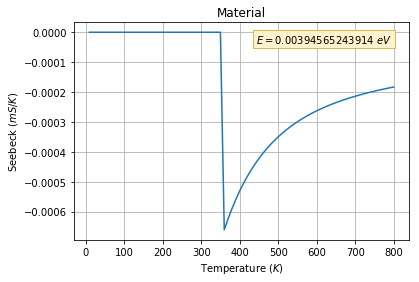

In [3]:
# INPUT
E = 0.003945652439139415
prop = 'S'

# Exemplo de como plotar:

x = data[data['E'] == E]['T']
y = data[data['E'] == E][prop]

plt.plot(x,y)

plt.xlabel('Temperature ($K$)')
plt.ylabel('Seebeck ($mS/K$)')

plt.title('Material')

plt.grid()

# Mais detalhes sobre annotate: https://matplotlib.org/tutorials/text/annotations.html
plt.annotate(xy=(.95,.95),                    # Posição da nota
             s='$E = {E}\ eV$'.format(E=E), # Conteúdo
             xycoords='axes fraction',        # Tipo de coordenadas 
             va='top',                        # va: vertical alignment
             ha='right',                      # ha: horizontal alignment
             bbox=bbox                        # Estilo da caixa, criamos uma na variável **bbox**
            )

# Salvar a figura
#plt.savefig(path/to/name.png,dpi=100)

#### Propriedade Termoelétrica vs Energia

Text(0.95,0.95,'$T = 300\\ K$')

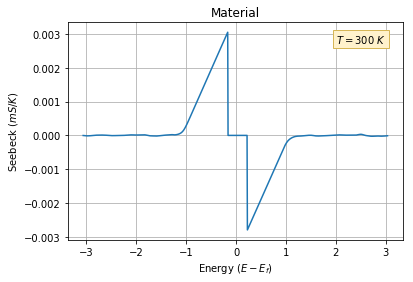

In [4]:
# INPUT
temp = 300
prop = 'S'

# Exemplo de como plotar:
  
x = data[data['T'] == temp]['E']
y = data[data['T'] == temp][prop]

plt.plot(x,y)

plt.xlabel('Energy ($E - E_f$)')
plt.ylabel('Seebeck ($mS/K$)')

plt.title('Material')

plt.grid()

# Mais detalhes sobre annotate: https://matplotlib.org/tutorials/text/annotations.html
plt.annotate(xy=(.95,.95),                    # Posição da nota
             s='$T = {T}\ K$'.format(T=temp), # Conteúdo
             xycoords='axes fraction',        # Tipo de coordenadas 
             va='top',                        # va: vertical alignment
             ha='right',                      # ha: horizontal alignment
             bbox=bbox                        # Estilo da caixa, criamos uma na variável **bbox**
            )

# Salvar a figura
#plt.savefig(path/to/name.png,dpi=100)

### Estrutura de Bandas vs Propriedade Termoelétrica

Nesta seção analisaremos a estrutura de bandas do material, para isso será necessário conter em seu diretório SIESTA o arquivo .bands.

#### Estrutura de Bandas

{'gap': 2.0305}

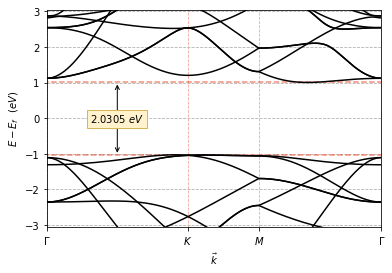

In [5]:
ax = plt.gca() # gca = get current axis
plotBand(ax,parameters,gap=True)

#### Estrutura de Bandas vs Propriedade Termoelétrica

Text(0.5,1,'Seebeck ($mV/K$)')

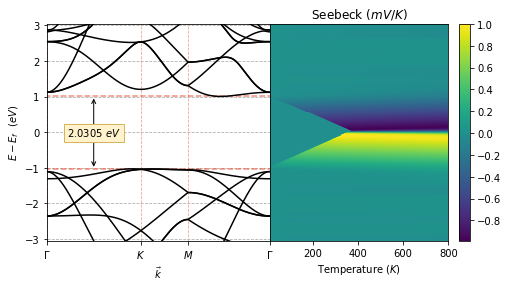

In [6]:
# INPUT
prop = 'S'

from numpy import meshgrid, array

# Configura o aspecto da figura (altura/largura)
plt.figure(figsize=plt.figaspect(1/2.))

# Remove a distancia horizontal (wspace) entre os subplots (eixos)
plt.subplots_adjust(wspace=0)

# PLOT 1
ax = plt.subplot(1,2,1)
plotBand(ax,parameters,gap=True)

# PLOT 2
ax = plt.subplot(1,2,2)

data = read_trace(parameters)
dEf = data['E'].unique()
dT  = data['T'].unique()
myprop = data[prop]

X,Y = meshgrid(dT,dEf)
Z = array(myprop).reshape(dEf.size,dT.size)*X

plt.contourf(X,Y,Z,300)
cb = plt.colorbar()

plt.yticks([])
plt.xlabel('Temperature ($K$)')
plt.title('Seebeck ($mV/K$)')

### Estudo da Figura de Mérito

#### $ZT_e$

Podemos plotá-lo em termos da energia (**E**), da densidade de transportadores de carga (**N**) ou da temperatura (**T**)

Text(0.95,0.95,'$T = 300\\ K$')

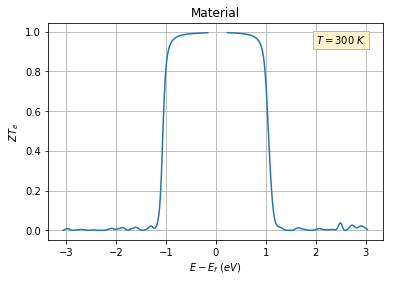

In [7]:
data = read_trace(parameters)

# INPUT
key_x = 'E'
t = 300

x = data[key_x][data['T'] == t].unique()
y = data['ZT'][data['T'] == t]

# Plotando grafico
plt.plot(x,y)

# Configuracoes
plt.ylabel('$ZT_e$')
plt.xlabel({
            'N':'Charge carrier concentration',
            'E':'$E-E_f\ (eV)$'
           }[key_x])
plt.grid()
plt.title('Material')

# Mais detalhes sobre annotate: https://matplotlib.org/tutorials/text/annotations.html
plt.annotate(xy=(.95,.95),                    # Posição da nota
             s='$T = {T}\ K$'.format(T=t),    # Conteúdo
             xycoords='axes fraction',        # Tipo de coordenadas 
             va='top',                        # va: vertical alignment
             ha='right',                      # ha: horizontal alignment
             bbox=bbox                        # Estilo da caixa, criamos uma na variável **bbox**
            )


#### Máximo $ZT_e$

Para esta tarefa separamos o processo de mineração do processo de geração dos gráficos devido à primeira tarefa ser mais custosa.

**ATENÇÃO: Este resultado pode levar alguns segundos para ser gerado**

In [8]:
data = mineZTMax(parameters)

A variável *data* contém as seguintes chaves com seus significados:

| chave   | Significado |
|---------|-------------|
| ZT      | ZT eletrônico máximo ($ZT_{e,max}$) |
| E       | Intervalor energia |
| T       | Temperatura correspondente ao $ZT_{e,max}$ |
| N       | Densidade de transportadores de carga correspondente à $ZT_{e,max}$ |

Conforme podemos ver abaixo

In [9]:
data.keys()

['ZT', 'E', 'T', 'N']

Text(0,0.5,'$T(ZT_{e,max})$')

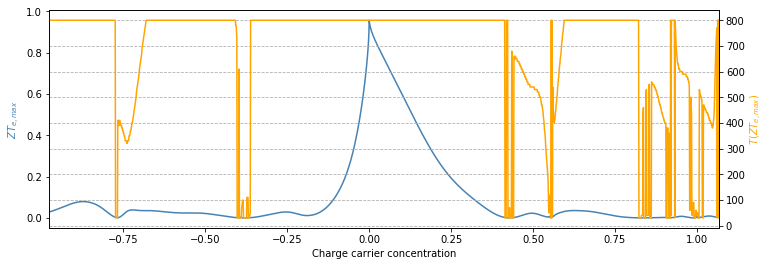

In [10]:
# INPUT
key_x = 'N'

# Aspecto da figura recomendado
plt.figure(figsize=plt.figaspect(1/3.))

# Plot do ZT maximo
plt.plot(data[key_x],data['ZT'],color='steelblue')

# Configuracoes
plt.margins(x=0)
plt.ylabel('$ZT_{e,max}$',color='steelblue')
plt.xlabel({
            'N':'Charge carrier concentration',
            'E':'$E-E_f\ (eV)$'
           }[key_x])

# ======================================================
# Cria eixo vertical oposto compartilhando o eixo x
plt.twinx(plt.gca())

# Plot temperatura correspondente
plt.plot(data[key_x],data['T'],c='orange')

# Configuracoes
plt.grid(ls='--')
plt.margins(x=0)
plt.ylabel('$T(ZT_{e,max})$',color='orange')

## Análise do arquivo .condtens

Nesta seção analisaremos as informações contidas no arquivo .condtens

Text(0,0,'')

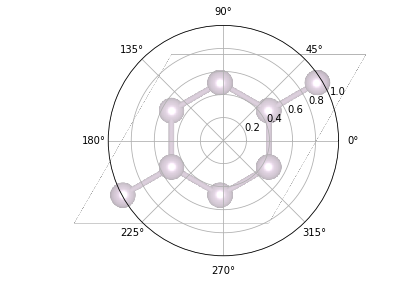

In [11]:
# INPUT
img = 'examples/phosphorene/structure.png' # imagem da estrutura
prop = 'S' # 'S' ou 's/t' ou 'ke'

# plotCondTens(prop,vec=[1,0],img,param)

data = read_condtens(prop, parameters)

img = plt.imread(img)

fig = plt.figure()

ax_img = fig.add_axes([0.100000001,0.1,0.8,0.8])
ax_polar = fig.add_axes([0.1,0.1,0.8,0.8],projection='polar')

ax_img.imshow(img,alpha=0.5)
ax_img.axis('off')

ax_polar.patch.set_alpha(0.1)

ax_polar.annotate(xytext=(0,0),
                  s='',
                  xy=(1,2),
                  arrowprops=dict(arrowstyle='->')
                 )
# TODO